In [107]:
## importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
## building validation framework 
from sklearn.model_selection import train_test_split 
## categorical encoding
from sklearn.feature_extraction import DictVectorizer
## regression model 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingRegressor

## metrics 
from sklearn.metrics import root_mean_squared_error

In [2]:
## data loading
data = pd.read_csv("customer_churn_prediction_project/Dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
## data preview and understanding
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
## check the number of rows and columns 
print(f"{data.shape[0]}   {data.shape[1]}")

7043   21


In [6]:
## get a summary description of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
## checking for missing values
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
## checking for duplicated values 
data.duplicated().sum()

0

In [9]:
## checking type on columns
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
## lets return the total counts of unique values in each column 
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [11]:
for each_name in data.columns: 
    print(each_name)
    print(data[each_name].unique())

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

In [12]:
Data preprocessing
normalize the columns
normalizing column types
year, numberofdoors, vhecial_size, v
replacing unsual characters with NaN values
Normalizing column names
Filling of missing

SyntaxError: invalid syntax (4283366557.py, line 1)

In [38]:
##change column names to lower case and replace spaces with underscore
data.columns = data.columns.str.lower().str.replace(' ', '_')

In [40]:
## changing data types into category
data['churn'] = data['churn'].astype('category')
data['phoneservice'] = data['phoneservice'].astype('category')
data['internetservice'] = data['internetservice'].astype('category')
data['customerid'] = data['customerid'].astype('category')
data['contract'] = data['contract'].astype('category')
data['dependents'] = data['dependents'].astype('category')
data['multiplelines'] = data['multiplelines'].astype('category')
data['onlinesecurity'] = data['onlinesecurity'].astype('category')
data['onlinebackup'] = data['onlinebackup'].astype('category')
data['deviceprotection'] = data['deviceprotection'].astype('category')
data['paymentmethod'] = data['paymentmethod'].astype('category')
data['techsupport'] = data['techsupport'].astype('category')
data['streamingmovies'] = data['streamingmovies'].astype('category')
data['streamingtv'] = data['streamingtv'].astype('category')
data['paperlessbilling'] = data['paperlessbilling'].astype('category')
data['gender'] = data['gender'].astype('category')
data['partner'] = data['partner'].astype('category')
data['totalcharges'] = data['totalcharges'].astype('category')

In [42]:
data.dtypes

customerid          category
gender              category
seniorcitizen          int64
partner             category
dependents          category
tenure                 int64
phoneservice        category
multiplelines       category
internetservice     category
onlinesecurity      category
onlinebackup        category
deviceprotection    category
techsupport         category
streamingtv         category
streamingmovies     category
contract            category
paperlessbilling    category
paymentmethod       category
monthlycharges       float64
totalcharges        category
churn               category
dtype: object

## DESCRIPTIVE ANALYSIS

In [ ]:
.statistical summary

In [44]:
data.describe().round()

,seniorcitizen,tenure,monthlycharges
count,7043.0,7043.0,7043.0
mean,0.0,32.0,65.0
std,0.0,25.0,30.0
min,0.0,0.0,18.0
25%,0.0,9.0,36.0
50%,0.0,29.0,70.0
75%,0.0,55.0,90.0
max,1.0,72.0,119.0


In [49]:
## numerical correlation
numerical_cols = data.select_dtypes(include=['int', 'float'])

corr_matrix = numerical_cols.corr()

corr_matrix['seniorcitizen']

seniorcitizen     1.000000
tenure            0.016567
monthlycharges    0.220173
Name: seniorcitizen, dtype: float64

##Exploratory Data Analysis
Target variable analysis
Plot a coorelation againts the target variable
Outlier analysis

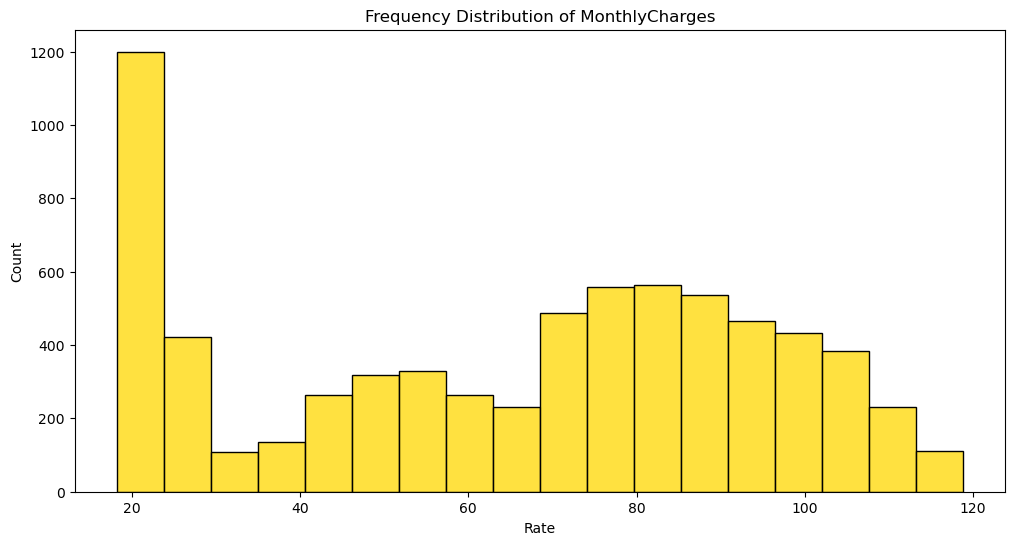

In [53]:
plt.figure(figsize=(12, 6))

plt.title('Frequency Distribution of MonthlyCharges')
plt.xlabel('Rate')
plt.ylabel('Count') 

sns.histplot(data['monthlycharges'][data['monthlycharges'] < 100000], color='gold') 

plt.show()


In [55]:
## log transformation 
log_price = np.log1p(data['monthlycharges'])

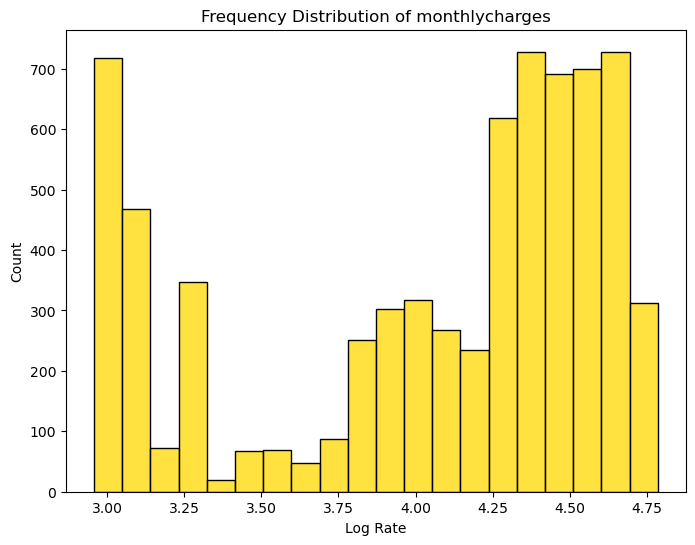

In [57]:
plt.figure(figsize=(8, 6))

plt.title('Frequency Distribution of monthlycharges')
plt.xlabel('Log Rate')
plt.ylabel('Count') 

sns.histplot(log_price, color='gold') 

plt.show()

In [59]:
data_train_full, data_test = train_test_split(data, test_size=0.2, random_state=11)
data_train, data_valid = train_test_split(data_train_full, test_size=0.25, random_state=11)


print(f'Size of Training Dataset: {len(data_train)}')
print(f'Size of Validation Dataset: {len(data_valid)}')
print(f'Size of Testing Dataset: {len(data_test)}')
# print(f'Size of Training Dataset: {}')


Size of Training Dataset: 4225
Size of Validation Dataset: 1409
Size of Testing Dataset: 1409


In [61]:
## selecting target variable from the dataframe 
y_train = data_train['monthlycharges']
y_valid = data_valid['monthlycharges']
y_test = data_test['monthlycharges']

In [ ]:
y_train

In [63]:
## deleting the target variable from the dataframe
del data_train['monthlycharges']
del data_valid['monthlycharges']
del data_test['monthlycharges'] 

In [65]:
data_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
totalcharges        0
churn               0
dtype: int64

In [ ]:
## Data Preprocessing 2

In [67]:
## converting dataframe to a vector 
y_train = np.log1p(y_train).values 
y_valid = np.log1p(y_valid).values 
y_test = np.log1p(y_test).values

In [69]:
y_train

array([4.51743127, 4.48919801, 4.21064502, ..., 4.59461467, 3.95508249,
       4.65823691])

In [71]:
## converting dataframe to matrix format / numpy array 
X_train = data_train.select_dtypes(include=['int', 'float']).values
X_valid = data_valid.select_dtypes(include=['int', 'float']).values
X_test = data_test.select_dtypes(include=['int', 'float']).values

In [73]:
X_train

array([[ 1, 19],
       [ 0,  9],
       [ 0, 59],
       ...,
       [ 1, 62],
       [ 0, 10],
       [ 0, 41]], dtype=int64)

## Training a Baseline Linear Regression

In [75]:
## creating an instance of a regression 
lr_model = LinearRegression() 

## fit the data to model 
lr_model.fit(X_train, y_train)

LinearRegression()

In [77]:
## generate validation predictions on the validation set  
y_valid_pred = lr_model.predict(X_valid)

In [79]:
y_valid_pred

array([4.04664478, 3.85275422, 3.89784505, ..., 4.14584459, 4.38899829,
       4.0917356 ])

In [81]:
## measure the accuracy 
rmse = root_mean_squared_error(y_valid, y_valid_pred) 

print(f'Validation Accuracy: {round(rmse, 2) * 100} %')

Validation Accuracy: 56.00000000000001 %


In [83]:
data_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'totalcharges', 'churn'],
      dtype='object')

In [87]:
## Create a new list of the col names
cat_fe_1 = ['customerid', 'gender']
numerical_cols= ['seniorcitizen','tenure','totalcharges']

data_train_fe_1 = data_train[numerical_cols + cat_fe_1]

data_valid_fe_1 = data_valid[numerical_cols + cat_fe_1]  

In [89]:
## convert our dataframe to a dictionary
dict_train_fe_1 = data_train_fe_1.to_dict(orient= 'records')
dict_valid_fe_1 = data_valid_fe_1.to_dict(orient= 'records')

In [91]:
## create an instance 
dv=DictVectorizer(sparse=False)

dv.fit(dict_train_fe_1)


DictVectorizer(sparse=False)

In [93]:
X_train_fe_1 = dv.transform(dict_train_fe_1)
X_valid_fe_1 = dv.transform(dict_valid_fe_1)

In [95]:
X_train_fe_1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
## train fe_1 model

In [97]:
lr_fe_1_model = LinearRegression()
lr_fe_1_model.fit(X_train_fe_1, y_train)

LinearRegression()

In [98]:
y_valid_pred_fe_1 =lr_fe_1_model.predict(X_valid_fe_1)

In [99]:
rmse_fe_1 = root_mean_squared_error(y_valid, y_valid_pred_fe_1)

print(f'Log Reg Validation Metric for Fe_1: { round(rmse_fe_1, 2) *100} %')

Log Reg Validation Metric for Fe_1: 55.00000000000001 %


In [115]:
data.to_csv('clean_iris_dataset.csv')